In [8]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [9]:
df = pd.read_csv('archive\heart_failure_clinical_records_dataset.csv')

In [10]:
def show_plots(df, feature, label):
    
    plt.figure(figsize=(20, 3))
    
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x=feature, hue=label, bins=30, kde=True)
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 3, 2)
    plt.scatter(df[feature], df[label])
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[feature])
    plt.title('Boxplot')
    
    
    plt.show()

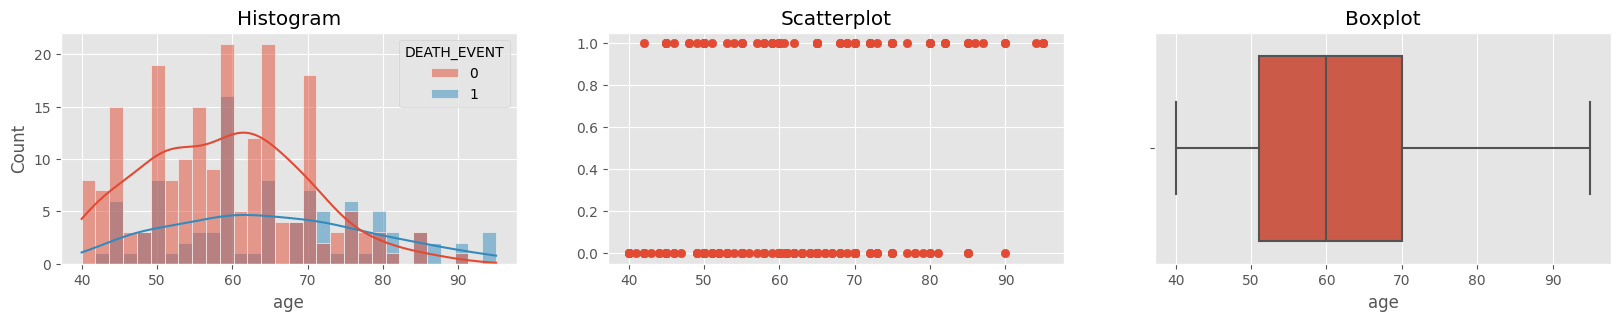

age


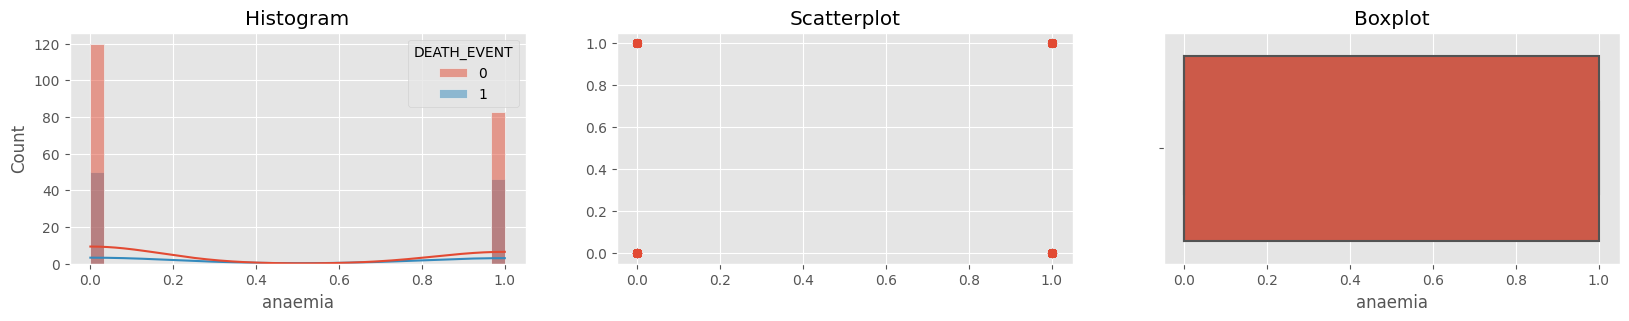

anaemia


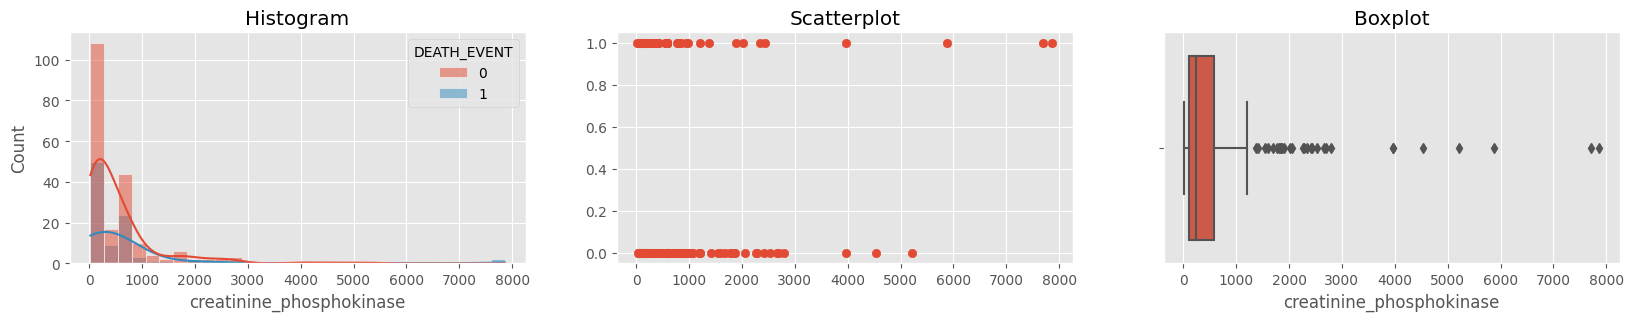

creatinine_phosphokinase


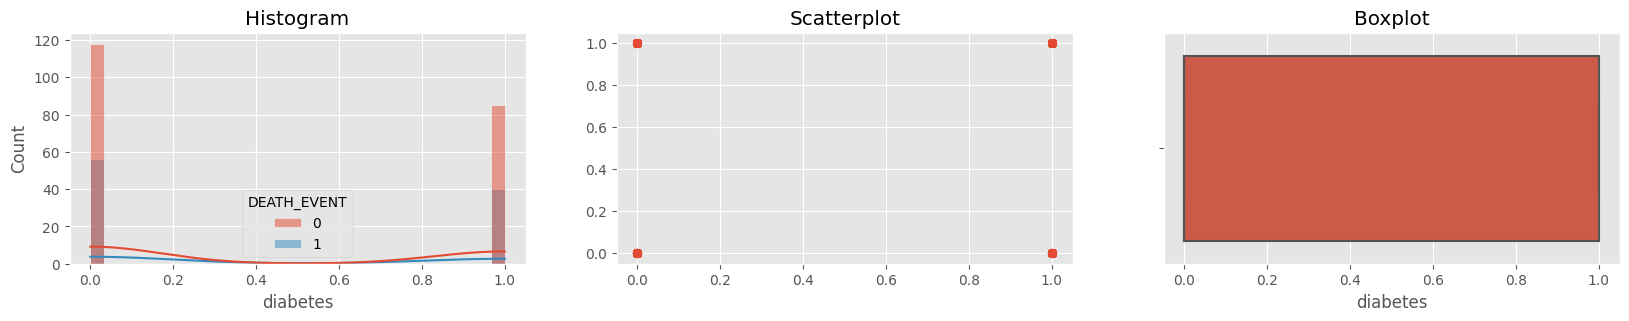

diabetes


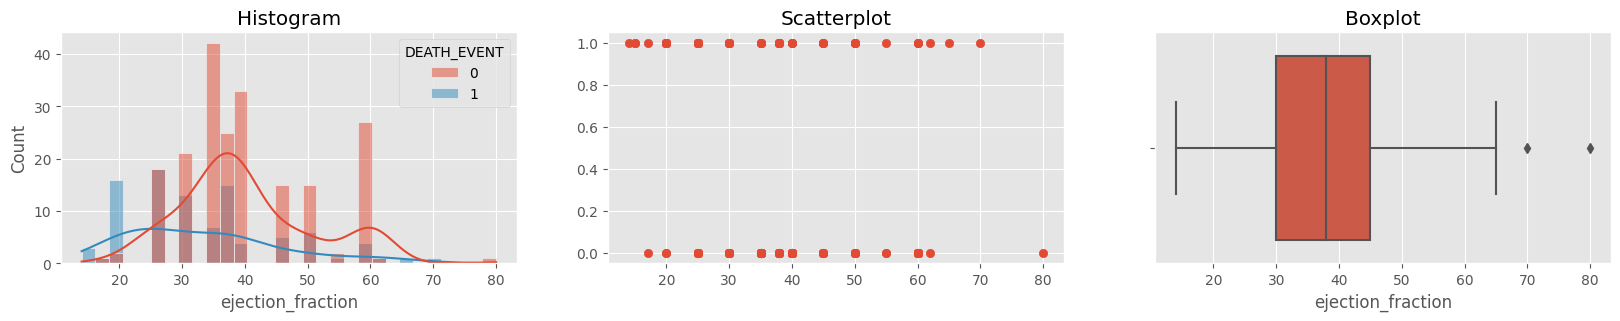

ejection_fraction


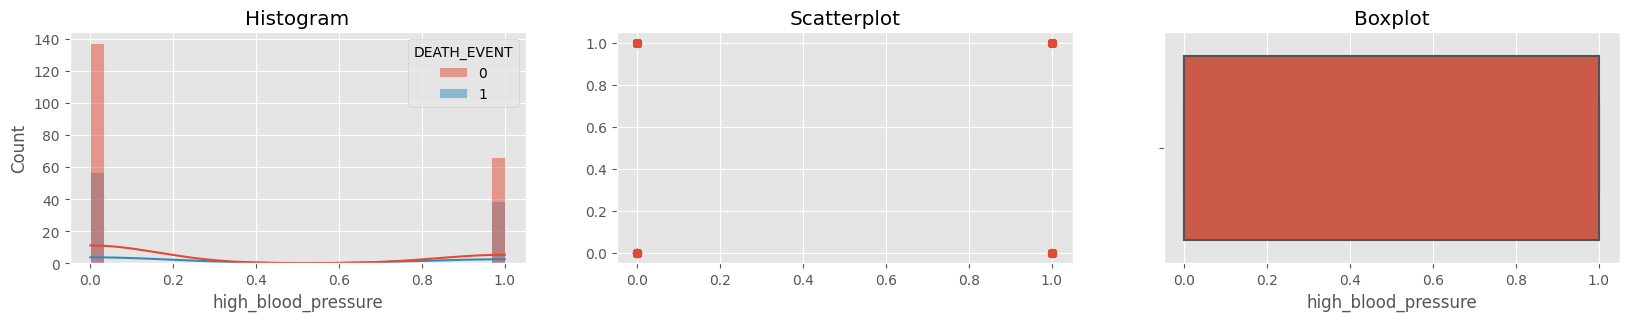

high_blood_pressure


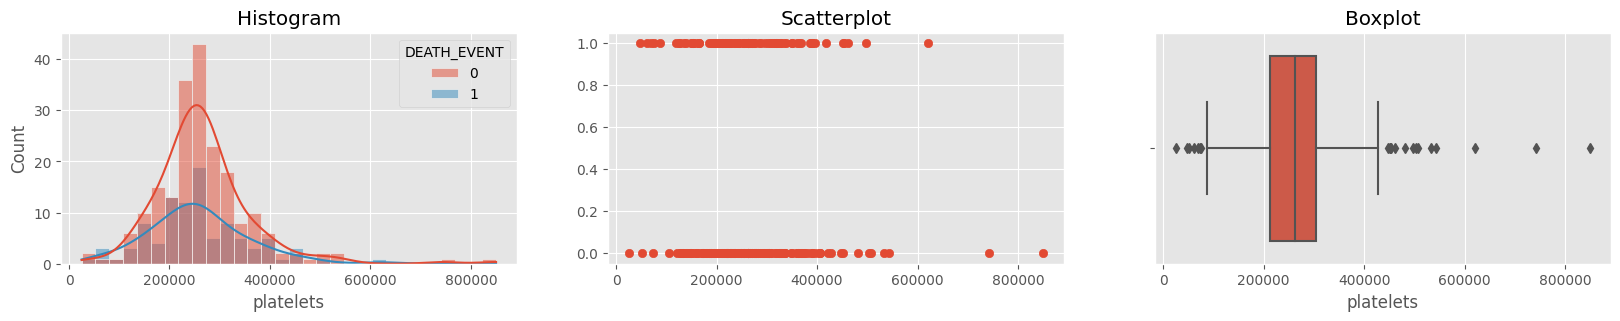

platelets


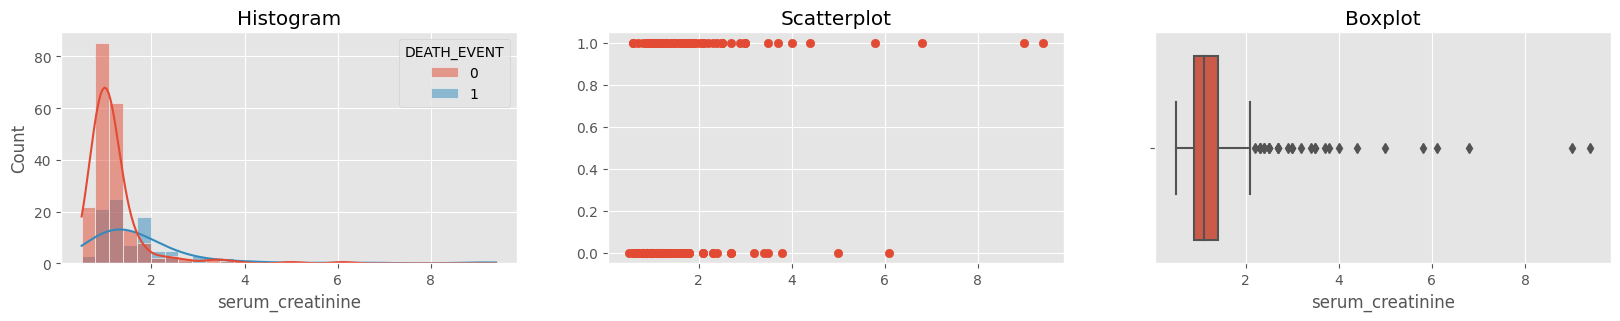

serum_creatinine


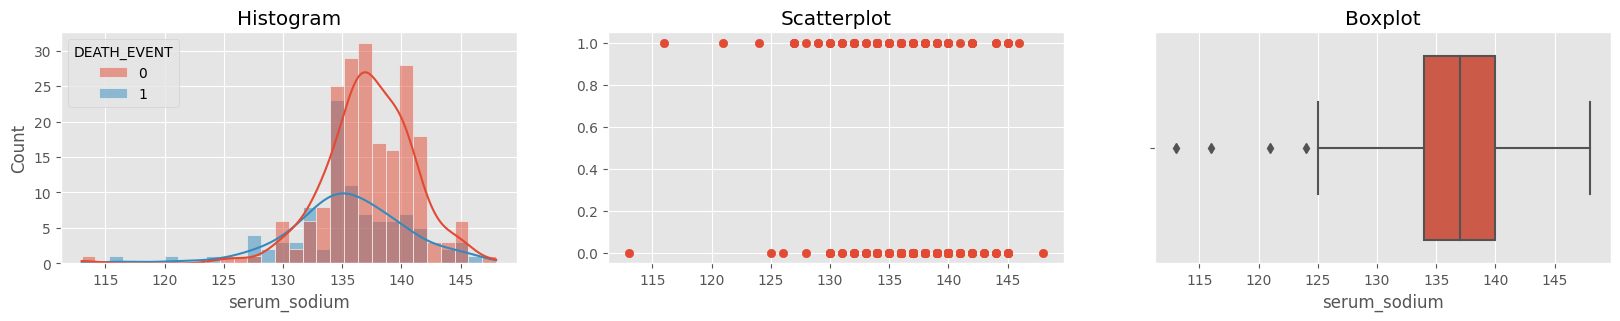

serum_sodium


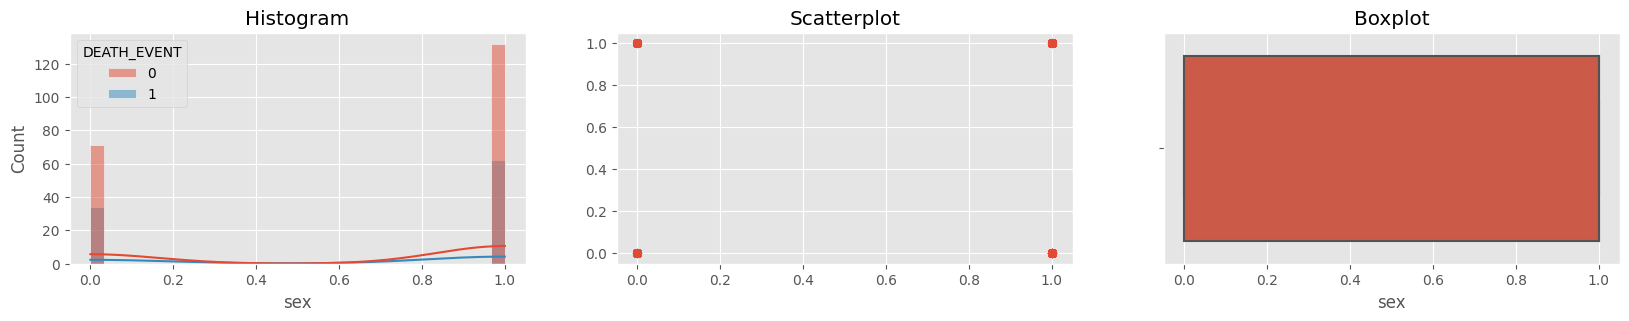

sex


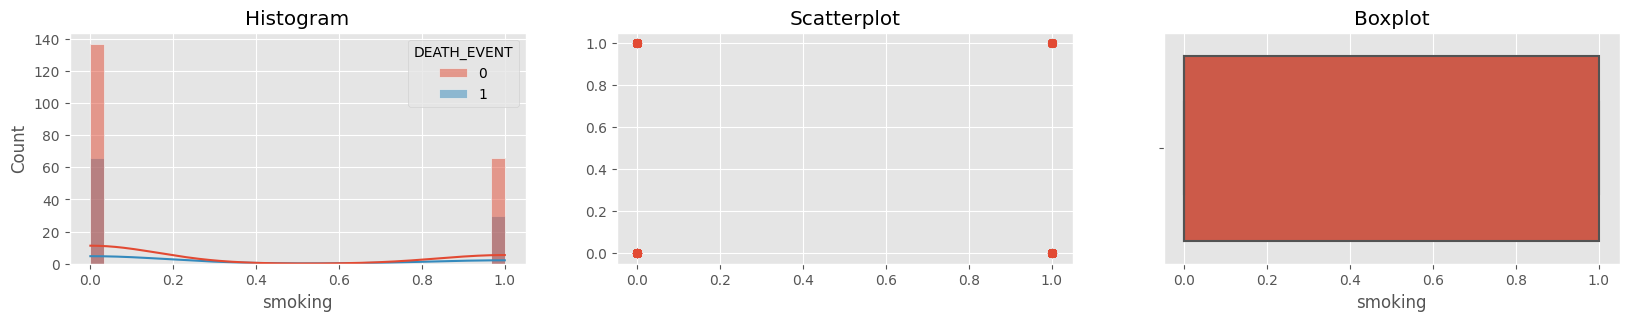

smoking


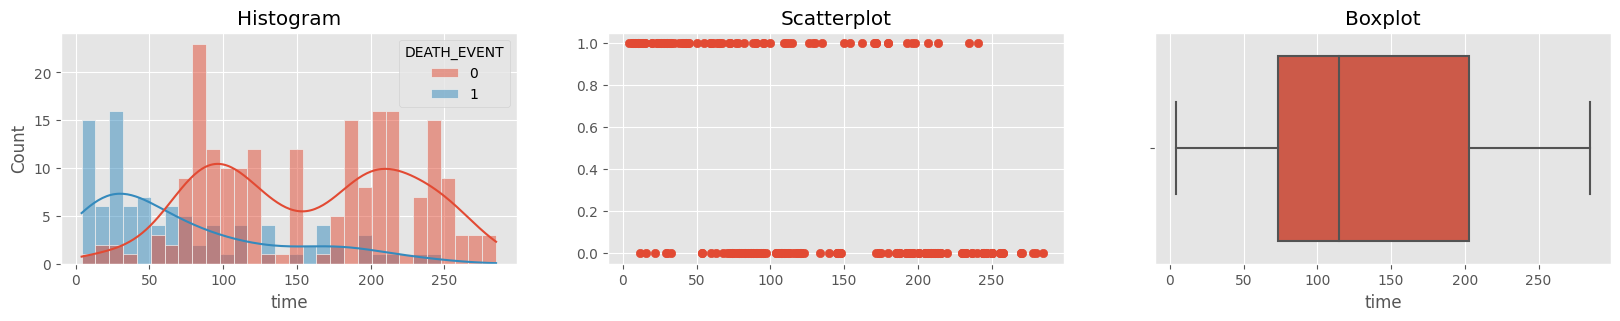

time


In [11]:
# showing plots for all features
for col in df.columns[:-1]:
    show_plots(df, col, df.columns[-1])
    print(col)

In [12]:
# function to calulcate the upper limit and lower limit from IQR
def outlier_limits(df, col):
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    return UL, LL

In [13]:
# replacing outliers with either upper_limit (if outlier is greater than UL) or lower_limit (if outlier is less than LL)
for col in ['creatinine_phosphokinase', 'platelets', 'serum_creatinine']:
    UL, LL = outlier_limits(df, col)
    df[col] = np.where((df[col] > UL), UL, df[col])
    df[col] = np.where((df[col] < LL), LL, df[col])

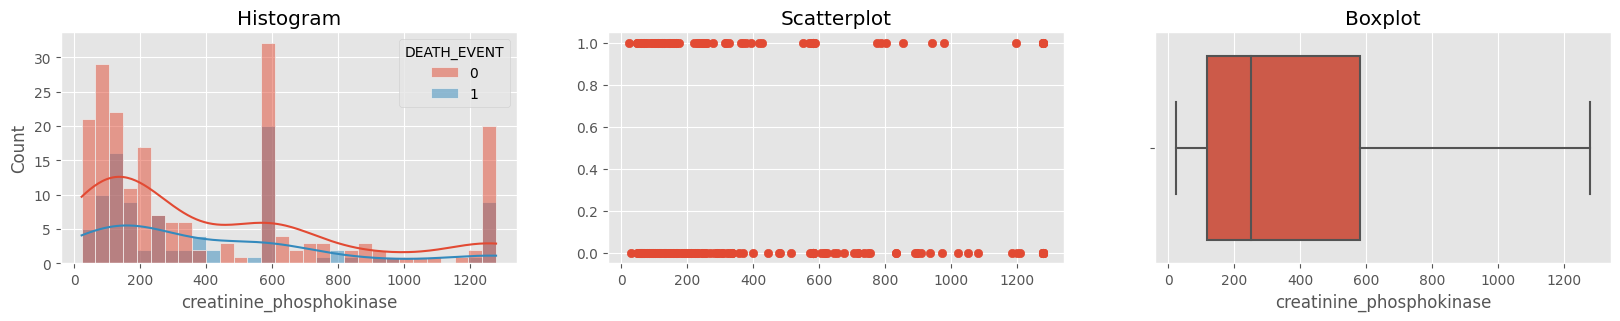

creatinine_phosphokinase


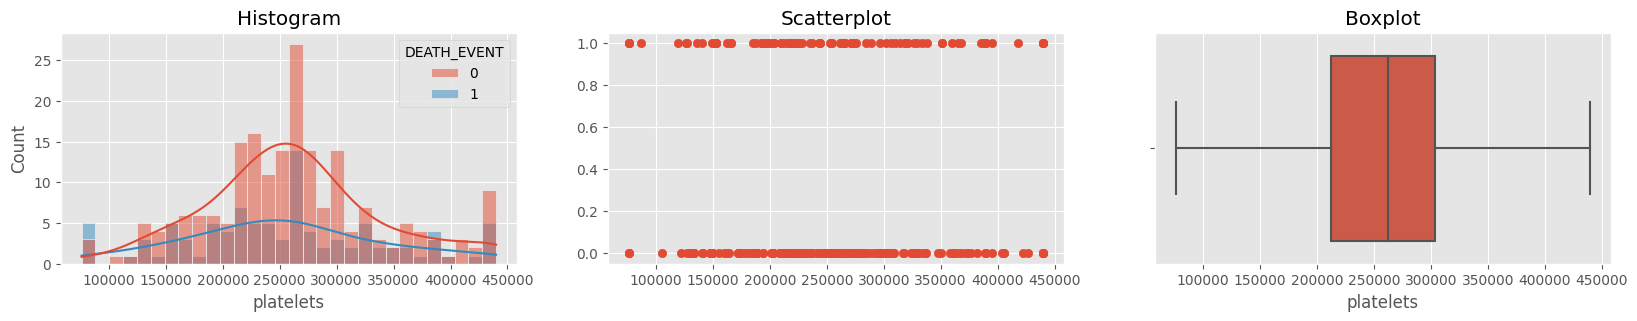

platelets


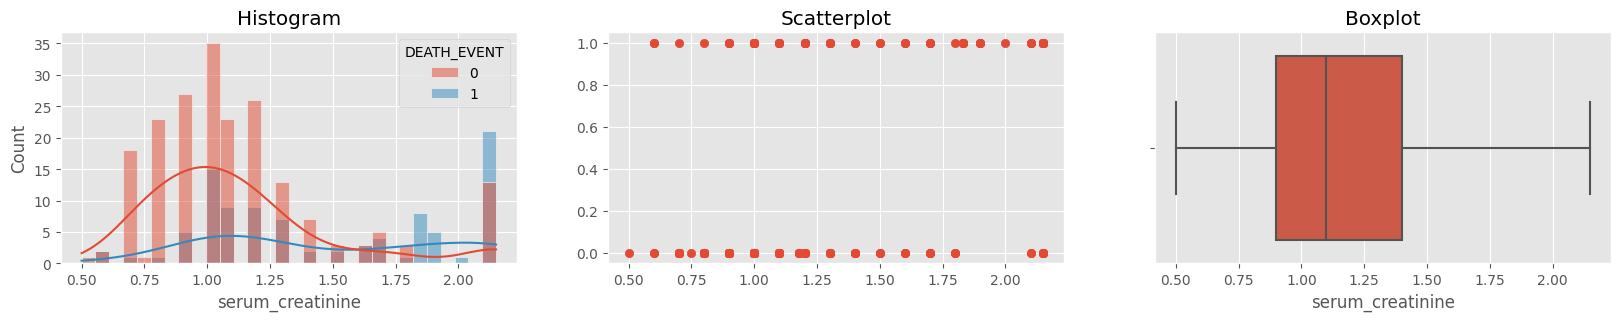

serum_creatinine


In [14]:
# plotting graphs again after handling outliers
for col in ['creatinine_phosphokinase', 'platelets', 'serum_creatinine']:
    show_plots(df, col, df.columns[-1])
    print(col)

<AxesSubplot: xlabel='age_group', ylabel='count'>

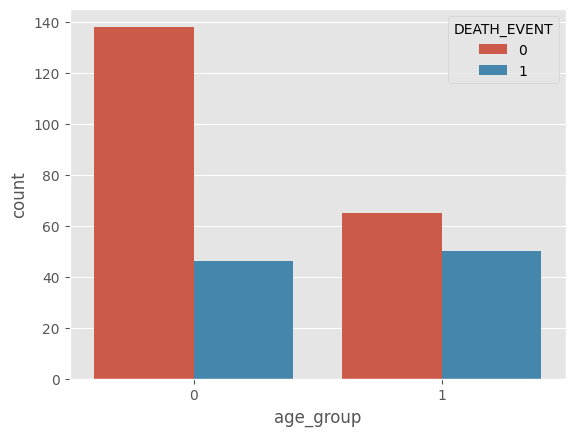

In [15]:
df['age_group'] = np.nan
df.loc[(df['age'] < 65), 'age_group'] = 0
df.loc[(df['age'] >= 65), 'age_group'] = 1

sns.countplot(data=df, x='age_group', hue='DEATH_EVENT', order=[0, 1])

In [17]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
age,1.000000,0.088006,-0.086870,-0.101012,0.060098,0.093289,-0.034159,0.253989,-0.045966,0.065430,0.018668,-0.224068,0.253729,0.805325
anaemia,0.088006,1.000000,-0.214201,-0.012729,0.031557,0.038182,-0.029060,-0.016329,0.041882,-0.094769,-0.107290,-0.141414,0.066270,-0.008542
creatinine_phosphokinase,-0.086870,-0.214201,1.000000,0.011575,-0.042176,-0.077600,-0.012715,-0.077821,0.004547,0.043623,-0.033310,0.114641,-0.006355,-0.097354
diabetes,-0.101012,-0.012729,0.011575,1.000000,-0.004850,-0.012732,0.070419,-0.009790,-0.089551,-0.157730,-0.147173,0.033726,-0.001943,-0.098634
ejection_fraction,0.060098,0.031557,-0.042176,-0.004850,1.000000,0.024445,0.066852,-0.165645,0.175902,-0.148386,-0.067315,0.041729,-0.268603,0.017679
high_blood_pressure,0.093289,0.038182,-0.077600,-0.012732,0.024445,1.000000,0.073361,-0.072465,0.037109,-0.104615,-0.055711,-0.196439,0.079351,0.109676
platelets,-0.034159,-0.029060,-0.012715,0.070419,0.066852,0.073361,1.000000,-0.052139,0.050332,-0.124212,0.012990,-0.003807,-0.044132,-0.027681
serum_creatinine,0.253989,-0.016329,-0.077821,-0.009790,-0.165645,-0.072465,-0.052139,1.000000,-0.302966,0.034192,-0.043262,-0.176060,0.388469,0.166492
serum_sodium,-0.045966,0.041882,0.004547,-0.089551,0.175902,0.037109,0.050332,-0.302966,1.000000,-0.027566,0.004813,0.087640,-0.195204,-0.062303
sex,0.065430,-0.094769,0.043623,-0.157730,-0.148386,-0.104615,-0.124212,0.034192,-0.027566,1.000000,0.445892,-0.015608,-0.004316,0.005539


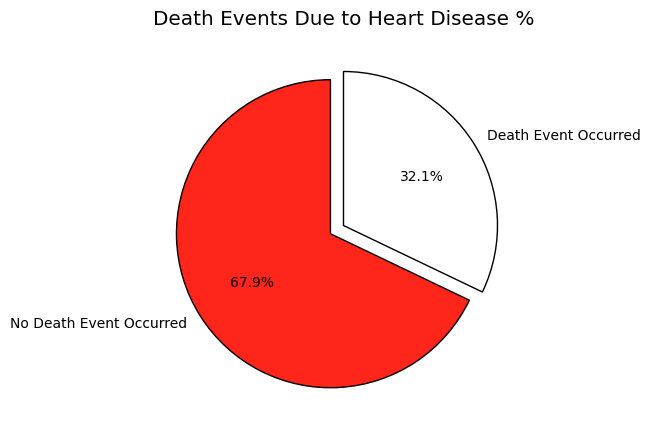

In [25]:
l = list(df['DEATH_EVENT'].value_counts())
colors = ['#FE251B','#FFFFFF']
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 1,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Death Event Occurred','Death Event Occurred'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Death Events Due to Heart Disease %');


plt.show()


In [27]:
data = df

anaemia = data[data['DEATH_EVENT'] == 1]['anaemia'].value_counts()
anaemia = [anaemia[0] / sum(anaemia) * 100, anaemia[1] / sum(anaemia) * 100]

diabetes = data[data['DEATH_EVENT'] == 1]['diabetes'].value_counts()
diabetes = [diabetes[0] / sum(diabetes) * 100,diabetes[1] / sum(diabetes) * 100]

hbp = data[data['DEATH_EVENT'] == 1]['high_blood_pressure'].value_counts()
hbp = [hbp[0] / sum(hbp) * 100,hbp[1] / sum(hbp) * 100]

sex = data[data['DEATH_EVENT'] == 1]['sex'].value_counts()
sex = [sex[0] / sum(sex) * 100,sex[1] / sum(sex) * 100]

smoke = data[data['DEATH_EVENT'] == 1]['smoking'].value_counts()
smoke = [smoke[0] / sum(smoke) * 100,smoke[1] / sum(smoke) * 100]

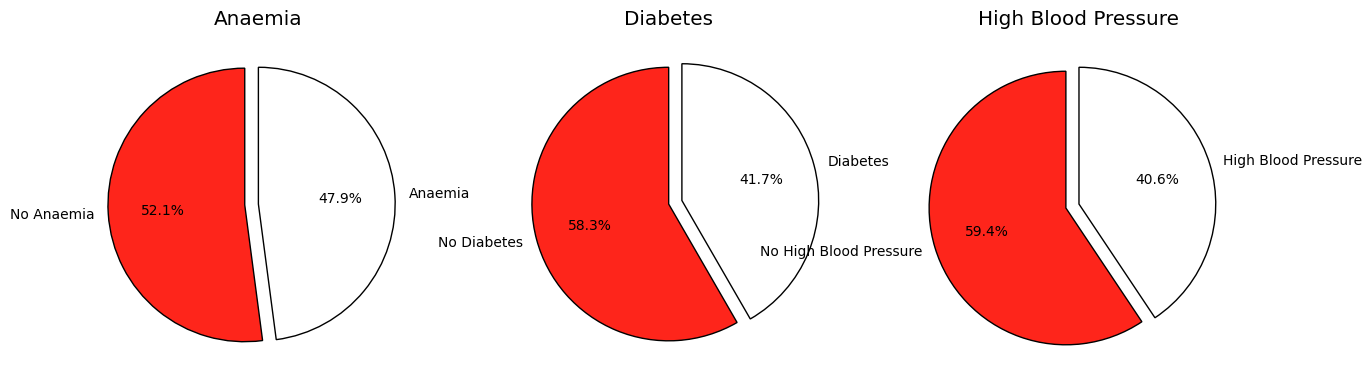

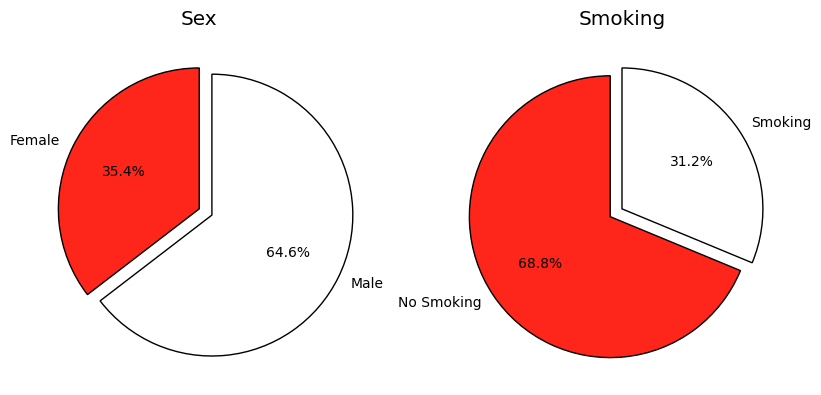

In [28]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))

plt.subplot(1,3,1)
plt.pie(anaemia,labels = ['No Anaemia','Anaemia'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Anaemia');

plt.subplot(1,3,2)
plt.pie(diabetes,labels = ['No Diabetes', 'Diabetes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Diabetes');

plt.subplot(1,3,3)
plt.pie(hbp,labels = ['No High Blood Pressure','High Blood Pressure'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('High Blood Pressure');

ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
plt.pie(sex,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(1,2,2)
plt.pie(smoke,labels = ['No Smoking','Smoking'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Smoking');

<AxesSubplot: >

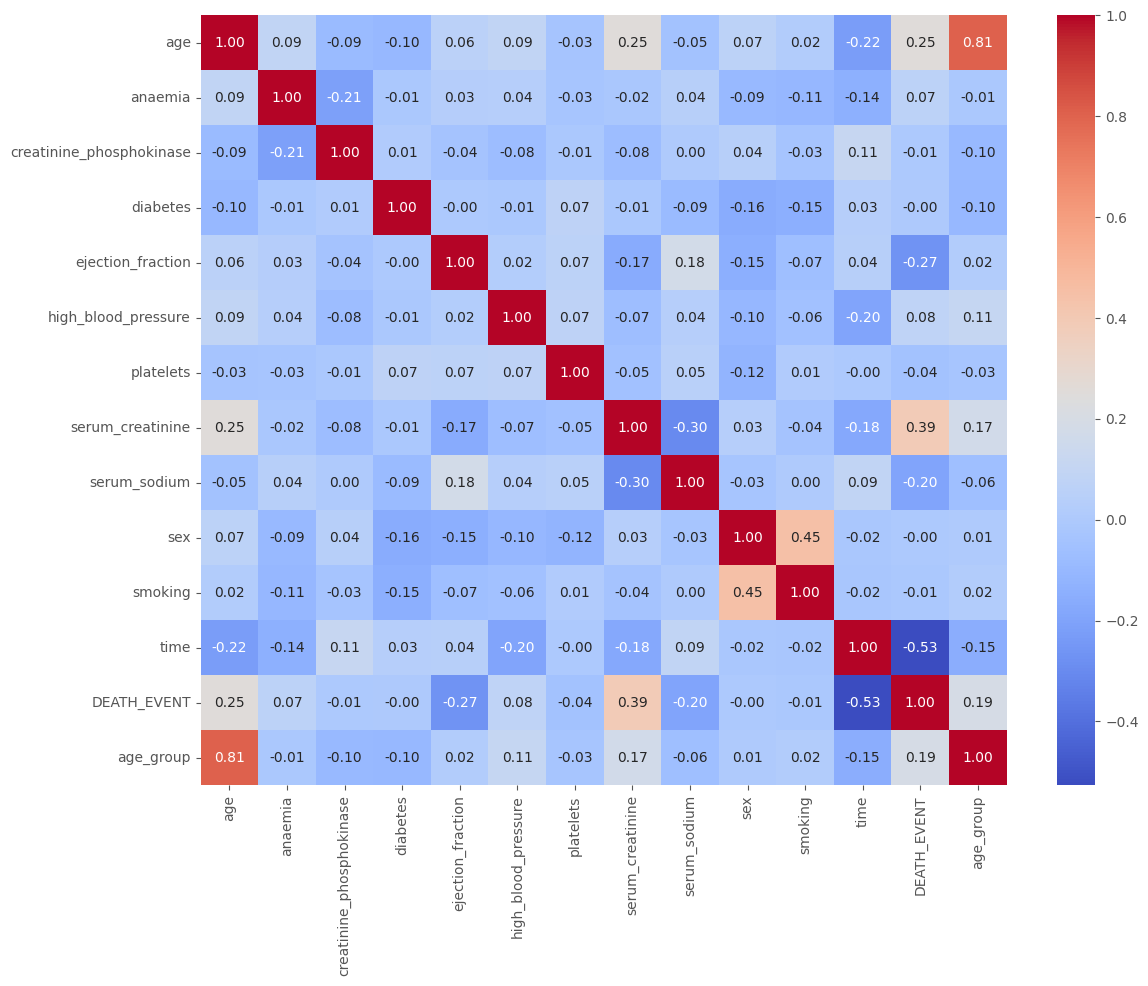

In [34]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

<AxesSubplot: xlabel='time', ylabel='age'>

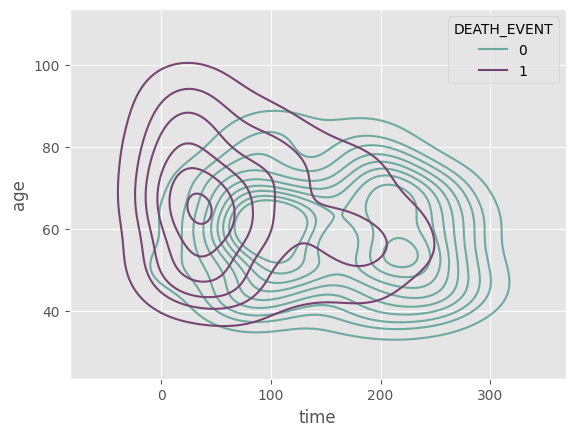

In [32]:
cols= ["#6daa9f","#774571"]
sns.kdeplot(x=data["time"], y=data["age"], hue =data["DEATH_EVENT"], palette=cols)

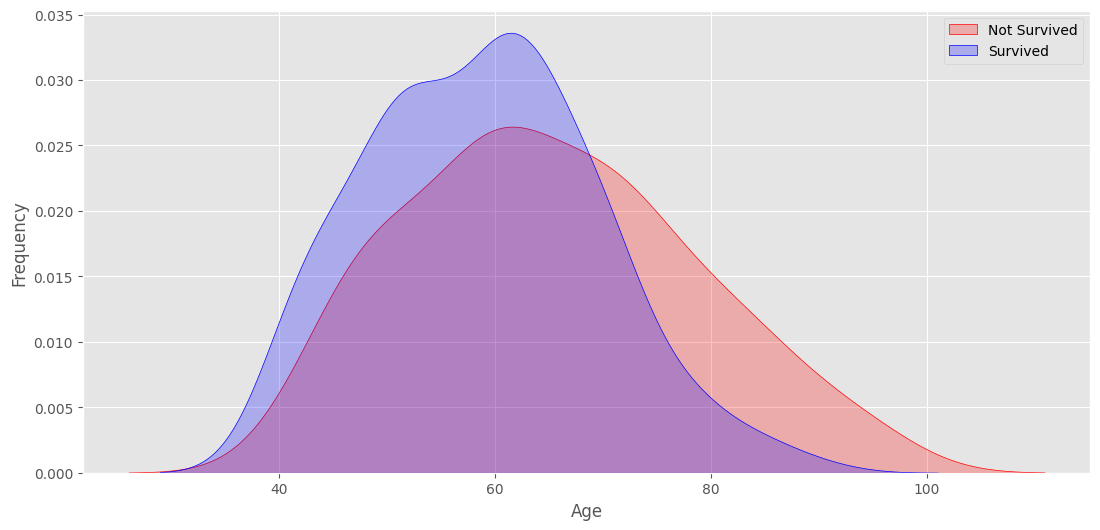

In [35]:
# Explore Age vs DEATH_EVENT
plt.figure(figsize=(13,6))
g = sns.kdeplot(df["age"][df["DEATH_EVENT"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["age"][df["DEATH_EVENT"] == 0], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g.legend(["Not Survived","Survived"])